# Regressão Linear com `tensorflow`

In [1]:
import numpy as np
X = np.array([[18],[23], [28], [33], [38],[43],[48],[53],[58],[63]])
y = np.array([[871],[1132],[1042],[1356],[1488],[1638],[1569],[1754],[1866],[1900]])

In [2]:
X

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [3]:
y

array([[ 871],
       [1132],
       [1042],
       [1356],
       [1488],
       [1638],
       [1569],
       [1754],
       [1866],
       [1900]])

> Com `tensorflow`, é preciso normalizar a escala de ambos os valores (X e y)

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler_x = StandardScaler()

In [6]:
X = scaler_x.fit_transform(X)

/home/felipe/.local/share/virtualenvs/tensorflow-machine-learning-deep-learning--rkUGFC5q/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/felipe/.local/share/virtualenvs/tensorflow-machine-learning-deep-learning--rkUGFC5q/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [9]:
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

/home/felipe/.local/share/virtualenvs/tensorflow-machine-learning-deep-learning--rkUGFC5q/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/felipe/.local/share/virtualenvs/tensorflow-machine-learning-deep-learning--rkUGFC5q/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
y

array([[-1.75751985],
       [-0.98083058],
       [-1.24865447],
       [-0.31424669],
       [ 0.07856167],
       [ 0.52493481],
       [ 0.31960317],
       [ 0.87013004],
       [ 1.20342199],
       [ 1.3045999 ]])

In [11]:
import matplotlib.pyplot as plt

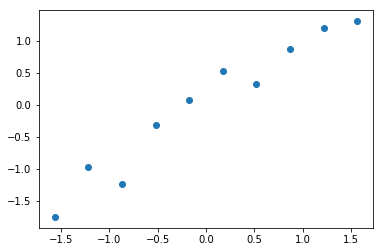

In [13]:
%matplotlib inline
plt.scatter(X, y)

> Fórmula da Regressão Linear Simples: `y = b0 + b1 * x`

In [17]:
np.random.seed(0)
np.random.rand(2)

array([0.5488135 , 0.71518937])

In [18]:
import tensorflow as tf

In [20]:
b0 = tf.Variable(.54, name='intercept')

In [21]:
b1 = tf.Variable(.71, name='coef')

In [23]:
erro = tf.losses.mean_squared_error(y, (b0 + b1 * X))
otimizador = tf.train.GradientDescentOptimizer(learning_rate=0.001)
treinamento = otimizador.minimize(erro)

In [24]:
init = tf.global_variables_initializer()

In [28]:
with tf.Session() as s:
    s.run(init)
    # print(s.run(b0))
    # print(s.run(b1))
    for i in range(1000): # 1000 épocas
        s.run(treinamento)
    b0_final, b1_final = s.run([b0, b1])

In [29]:
b0_final

0.07293497

In [30]:
b1_final

0.9359134

In [31]:
previsoes = b0_final + b1_final * X

In [32]:
previsoes

array([[-1.3933595 ],
       [-1.06751629],
       [-0.74167307],
       [-0.41582985],
       [-0.08998664],
       [ 0.23585658],
       [ 0.56169979],
       [ 0.88754301],
       [ 1.21338623],
       [ 1.53922944]])

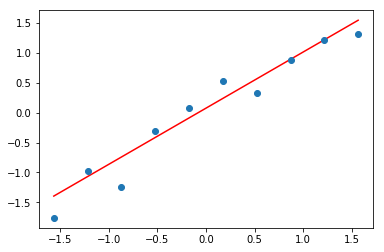

In [35]:
plt.plot(X, previsoes, 'r-')
plt.plot(X, y, 'o')

In [39]:
scaler_x.transform([[40]])

array([[-0.03481553]])

In [40]:
previsao = scaler_y.inverse_transform(b0_final + b1_final * scaler_x.transform([[40]]))

In [41]:
previsao

array([[1475.15950152]])

In [43]:
y1 = scaler_y.inverse_transform(y)
y1

array([[ 871.],
       [1132.],
       [1042.],
       [1356.],
       [1488.],
       [1638.],
       [1569.],
       [1754.],
       [1866.],
       [1900.]])

In [45]:
previsoes1 = scaler_y.inverse_transform(previsoes)
previsoes1

array([[ 993.37307127],
       [1102.86998723],
       [1212.3669032 ],
       [1321.86381917],
       [1431.36073513],
       [1540.8576511 ],
       [1650.35456707],
       [1759.85148303],
       [1869.348399  ],
       [1978.84531497]])

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y1, previsoes1)
mse = mean_squared_error(y1, previsoes1)

In [47]:
mae

67.91875458994167

In [48]:
mse

7153.9129941765395